# Osho Gnanasivam

## Research Question/Interests

Understanding the effect of different variables on the charges of medical coverage claimed to find out how they may be related.

## Description of Variables

- **Age:** Age of primary beneficiary
- **Sex:** Insurance contractor gender: female, male
- **BMI:** Body Mass Index, used as an indicator of body health, weights that are relatively high or low relative to height, objective index of body              weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **Children:** Number of children covered by health insurance / Number of dependents (of beneficiary)
- **Smoker:** Whether beneficiary smokes or not
- **Region:** the beneficiary's residential area in the US: northeast, southeast, southwest, northwest.
- **Charges:** Individual medical costs billed by health insurance

In [ ]:
import pandas as pd
import project_functions1 as pf 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Task 1 - EDA

In [ ]:
df = pf.load_and_process("../data/raw/raw_MC.csv")
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Checking for null-values ##

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


**No null values** found in any column!

# Task 2 - Analysis Pipeline 

## Identifying Outliers and removing them from the dataframe ##

Total number of outliers are 7


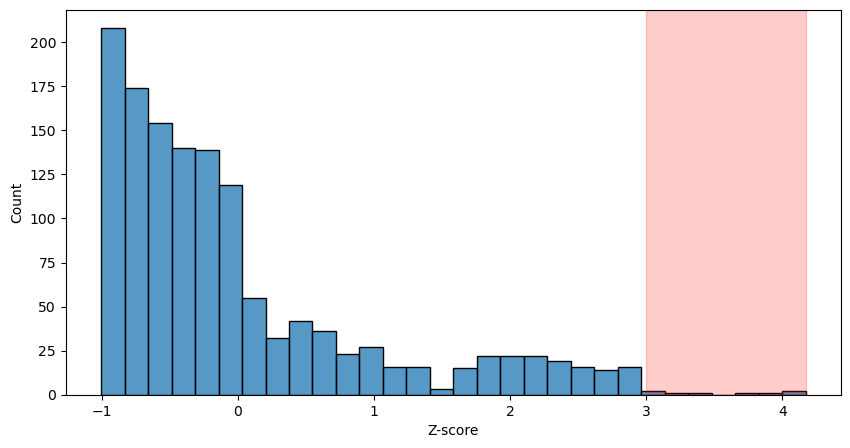

In [ ]:
pf.find_outliers(df.charges) #The part of the graph highlighted in red represents the outliers(skewed data outliers) in the value of charges
df = df[(df['charges'] < 3) | (df['charges'] > -3)] #Removes outliers that are not within the 99% confidence interval from dataset. Project_functions1.py for more stat info.

## Ranges and Unique Values in each column ##

In [ ]:
pf.rng_and_unqval(df)

Age Range: 18 to 64
BMI Range: 15.96 to 53.13
Unique values in "Children": [0 1 3 2 5 4]
Unique values in "Sex": ['female' 'male']
Unique values in "Smoker": ['yes' 'no']
Unique values in "Region": ['southwest' 'southeast' 'northwest' 'northeast']


**All values** are appropriate, accurate and there is no outright redundancy in them. Hence, they do not need to be renamed/moved and can be used for analysis.

## Correlation Matrix ##

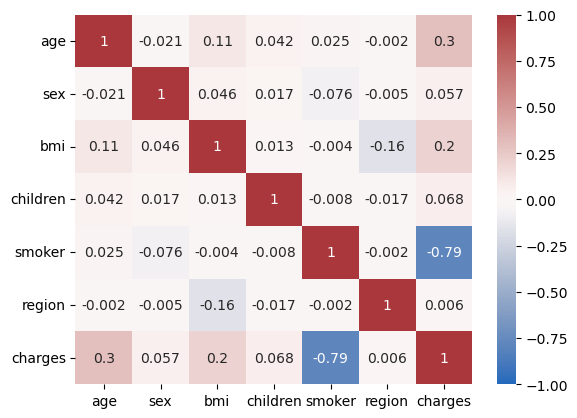

In [ ]:
df2 = pf.convert_catdata(df)
corr = df2.corr().round(3)
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

### General correlations ###
- Smoking has a strong negative correlation with the insurance charges (Medical costs billed tend to be lower for beneficiaries who are non-smokers)
- Age has a slight positive correlation with the insurance charges (Medical costs billed tend to be higher for beneficiaries who are older)
- BMI has a slight positive correlation with the insurance charges (Medical costs billed tend to be higher for beneficiaries with a higher BMI)
- A slight negative correlation between the variables region and bmi is noticed. Since {0}-> Southwest {1}->Southeast {2}->Northwest {3}-> Northeast was used in conversion, this indicates that the BMI Data collected in the North may be lower than the South. This may show a possible bias in data collection. 

Categorical data (Sex, Smoker and region) that has been converted into numerical forms reveals a big insight that smoking defintiely had a relationship with charges. Without this conversion, the strong relationship between smoking and charges could not be identified with a correlation matrix.


## Age and Smoker against Charges

<seaborn.axisgrid.FacetGrid>

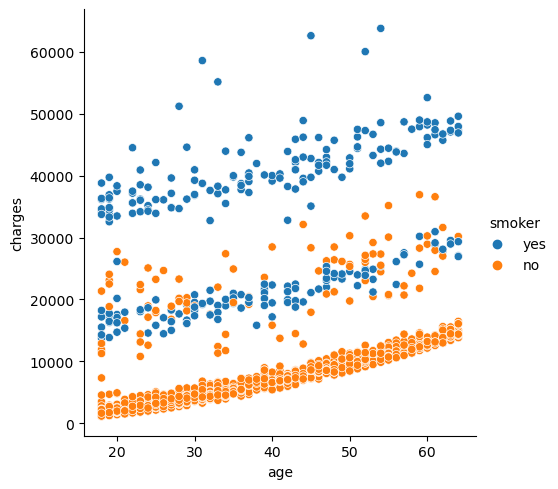

In [ ]:
sns.relplot(x = 'age', y = 'charges', hue = 'smoker', data = df)

## BMI and Sex against Charges ##

<seaborn.axisgrid.FacetGrid>

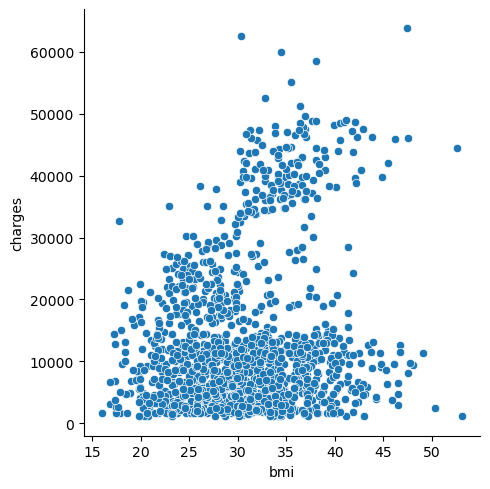

In [ ]:
sns.relplot(x = 'bmi', y = 'charges', data = df)

# Task 4 - Observations and Analysis


- There is a very obvious increase in medical charges claimed as the age of the beneficary rises. This is a very significant insight that can be observed from the Age and Smoking against Charges plot.
- It can also be observed that no smoking beneficiary had a claim of lesser than $10000 regardless of age or any other key factor. It can be concluded from this dataset, that smokers tend to claim a higher amount in insurance coverages than their non-smoking counter-part.
- With reference to the BMI against Charges plot, it can be observed that a large cluster tends to be within the 0-15000 range while a few points can be observed to be dispersed towards a higher value of charges as BMI increases. This explains the smaller correlation value that BMI had on the Charges as seen in the correlation matrix. It is unclear whether a larger BMI would mean a greater insurance claim from this dataset and more data would be required for something definitive.


# Aditri Chatterjee

## Research question/interests

I am interested in researching the relationship between BMI and medical insurance costs for people aged between 20 and 40.

**H0:** There is a direct relationship between BMI and medical insurance costs, i.e. higher the BMI, higher the costs.

**H1:** There is an inverse relationshhip between BMI and medical insurance costs, i.e. higher the BMI, lower the costs.

**H2:** There is no significant relationship between BMI and medical insurance costs, i.e BMI value is not correlated with the costs incurred by a patient.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Task 1: EDA

## Raw Data

In [ ]:
df = pd.read_csv("../data/raw/raw_MC.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Understanding Data

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Checking for Null Values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


No **null values** found in any column!

# Task 2: Analysis Pipeline

## Cleaning Data

In [ ]:
df_cleaned = df.copy().drop(['sex','children','smoker','region'],axis=1)
df_cleaned

,age,bmi,charges
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


The columns 'sex', 'children', 'smoker', and 'region' were removed from the dataset because my research question solely focuses on the relationship between age, BMI and the charges of medical insurance. This helps in localising the focus of the research question and having only the required data to handle.

### Removing outliers

In [ ]:
df_cleaned = df_cleaned[df_cleaned['age'].between(20,40)]
df_cleaned = df_cleaned.sort_values(by='age')
df_cleaned

,age,bmi,charges
105,20,28.025,17560.37975
210,20,33.000,1980.07000
1042,20,30.685,33475.81715
1252,20,27.300,16232.84700
166,20,37.000,4830.63000
...,...,...,...
448,40,29.600,5910.94400
1198,40,29.355,6393.60345
687,40,41.690,5438.74910
806,40,41.420,28476.73499


By removing outliers, I have conslidated my data parallel to my research question, focusing only on the people aged between 20 and 40. The reason for this range of age is because they are usually considered the able-bodied adults who can work in jobs.

In [ ]:
df_cleaned.describe()

,age,bmi,charges
count,564.000000,564.000000,564.000000
mean,29.746454,30.103138,10659.589696
std,6.063422,6.141325,11590.513886
min,20.000000,16.815000,1391.528700
25%,24.750000,25.900000,3558.195763
50%,30.000000,29.767500,5259.488700
75%,35.000000,34.100000,16162.283287
max,40.000000,52.580000,58571.074480


## Visualising Data and Finding Relationships

### BMI and Charges against Age

<AxesSubplot:xlabel='bmi', ylabel='charges'>

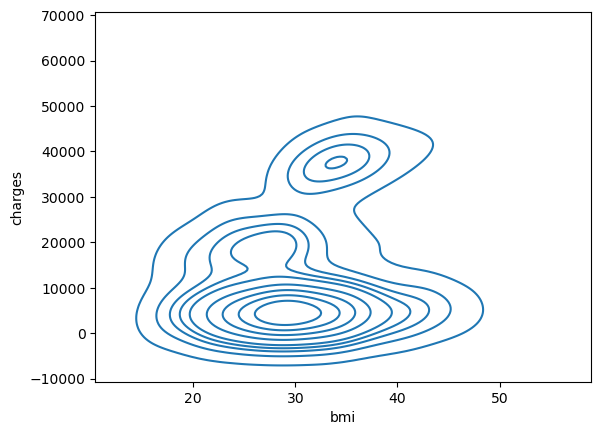

In [ ]:
sns.kdeplot(data=df_cleaned,x='bmi',y='charges')

It can be observed that for BMI in a range of approx. 10-50, the charges range from $0-10000.

However, there is a slight spike at the bmi range 25-30 with the associated charges ranging from $10000-20000.

There is a big spike at the bmi range 30-40 with the associated charges ranging from $30000-40000.

The reason for these spikes in unclear.

### BMI and Age against Charges

<AxesSubplot:xlabel='bmi', ylabel='age'>

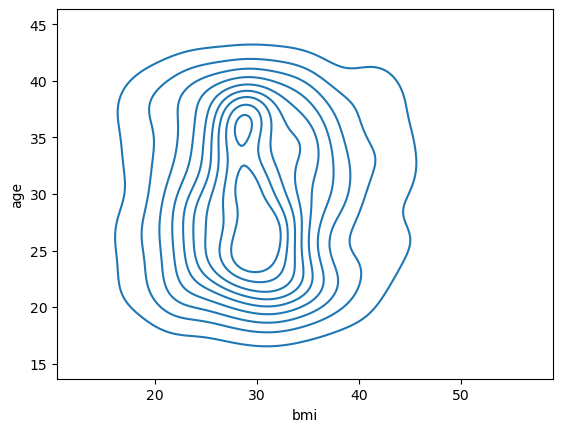

In [ ]:
sns.kdeplot(data=df_cleaned,x='bmi',y='age')

It can be observed that the bmi ranges from 20-45 for the selected people aging from 20-40. This helps in understanding the range of bmi we are working with.

### Age and Charges against BMI

<AxesSubplot:xlabel='age', ylabel='charges'>

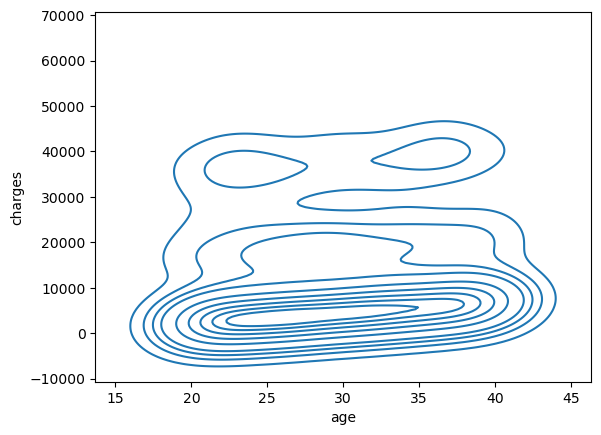

In [ ]:
sns.kdeplot(data=df_cleaned,x='age',y='charges')

It can be observed that for people in the age range of 20-40, the charges range from $0-10000.

However, there is a spike in charges for the age range of 25-35, with the associated charges ranging from $10000-20000.

There is a wide spike for the age range of 20-40 with their associated charges ranging from $10000-20000.

There is another wide spike for the age-range of 20-40 with their associated charges ranging from $30000-40000.

There are smaller isolated spikes for the age ranges of 20-25 and 35-40, with their associated charges ranging from $30000-40000 each.

The reason for these spikes is unclear.

# Task 3: Method Chaining

In [ ]:
import project_functions2 as p2
clean_data = p2.load_and_process("../data/raw/raw_MC.csv")
display(clean_data)

This is the required data that I would like to analyse for my research question.


,age,bmi,charges
105,20,28.025,17560.37975
210,20,33.000,1980.07000
1042,20,30.685,33475.81715
1252,20,27.300,16232.84700
166,20,37.000,4830.63000
...,...,...,...
448,40,29.600,5910.94400
1198,40,29.355,6393.60345
687,40,41.690,5438.74910
806,40,41.420,28476.73499


# Task 4: Research Analysis Conclusion

I started with an interest in understanding the relationship between BMI and the medical insurance costs. However, I quickly realised I needed to add a limiting factor to localilse my data and infer good results. As a result, I then looked at the people aged between 20 and 40 to conduct my analysis. The reason I chose this age range because they are generally considered able adults who can work jobs.

To begin my analysis, I hypothesised three situations:
1) There is a **direct**, i.e. positive, relationship between BMI and charges.
2) There is an **indirect** relationship, i.e. negative, relationship between BMI and charges.
3) There is **no distinguishable** relationship solely between BMI and charges.

Upon conducting my EDA, I noticed that there were some patterns between BMI, age and the medical insurance costs for the designated people. I observed that:

1) The bmi ranged from 20-45 for my selected age group range of 20-40. This observation helped me make better observations further down the analysis procedure.

2) For the BMI range of 20-45, the charges ranged from 0-10000 USD. And for people in the age range of 20-40, the charges ranged from $0-10000. These two observations overlap.

3) There were a couple of excpetions or "spikes" in the graphs, which I observed were interconnected.

    3a) For the BMI range 25-30, the associated charges ranged from 10000-20000 USD. And for the age ranges of 20-40, the associated charges ranged from $10000-20000 each.

    3b) For the BMI range 30-40, the associated charges ranged from 30000-40000 USD. And for the age-range of 20-40, their associated charges ranged from $30000-40000.

Note: The reason for these spikes is unclear.

Therefore, based on my observations, I concluded that:

1) In general, for the BMI range of 20-45 and age range of 20-40, the charges ranged from $0-10000.

2) For reasons inconclusive, the BMI range of 25-30 and age range of 20-40 sees a hike in the associated charges, ranging from $10000-20000.

3) For reasons inconclusive, the BMI range of 30-40 and the age-range of 20-40 sees a hike in the associated charges, ranging from $30000-40000.

Therefore, the overall conclusion to my research question stands that **there is no distinguishable relationship solely between BMI and charges**, with random hikes in charges being observed for all ages. This is possibly because many other factors in the original data, such as children, sex, smoker, and region, contribute to fluctuations in the medical insurance costs from person to person.

# Spandan Ghevriya

## Research question/interests
Is there a positive corrrelation between an individual's age and the medical costs billed by health insurance?
H0:There is no significant positive correlation between an individual's age and the medical costs billed by health insurance.
H1:There is a significant positive correlation between an individual's age and the medical costs billed by health insurance.

Is there a significant difference of medical costs billed between a smoker and a non-smoker?
H0:There is no significant difference of medical costs billed between a smoker and a non-smoker.
H1:There is a significant difference of medical costs billed between a smoker and a non-smoker.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [ ]:
dfMain = pd.read_csv("../data/raw/raw_MC.csv")
display(dfMain)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Task 1: Conduct an EDA

In [ ]:
dfMain.shape
# May dataset has 1338 columns and 7 rows 

(1338, 7)

In [ ]:
print(f'The output below shows the first 5 rows of my dataset. I can see some example values of each variable listed in the columns. ')
dfMain.head()

The output below shows the first 5 rows of my dataset. I can see some example values of each variable listed in the columns. 


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
dfMain.columns
# The columns in my dataset are: 'age', 'sex', 'bmi', 'children', 'smoker', 'region', and 'charges'. 
# These are the variable that were collected and can be studied. 

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
dfMain.nunique(axis=0)

# These are the unique values of each variable. 
# The oldest age is 47 years old.
# There are two types of sex; male and female 
# There are six different categories of children ranging from 0 to 6 children 
# There are two types of answers for smokers; yes and no
# There are 4 different regions; northeast, northwest, southeast, southwest
# There are 1337 different types of charges (this does not tell us much because it just means that none of the charges match).

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

I am graphing a correlation matrix to gain general understanding of all of my numeric variables. 
All of the variables have a correlation in the positive direction.


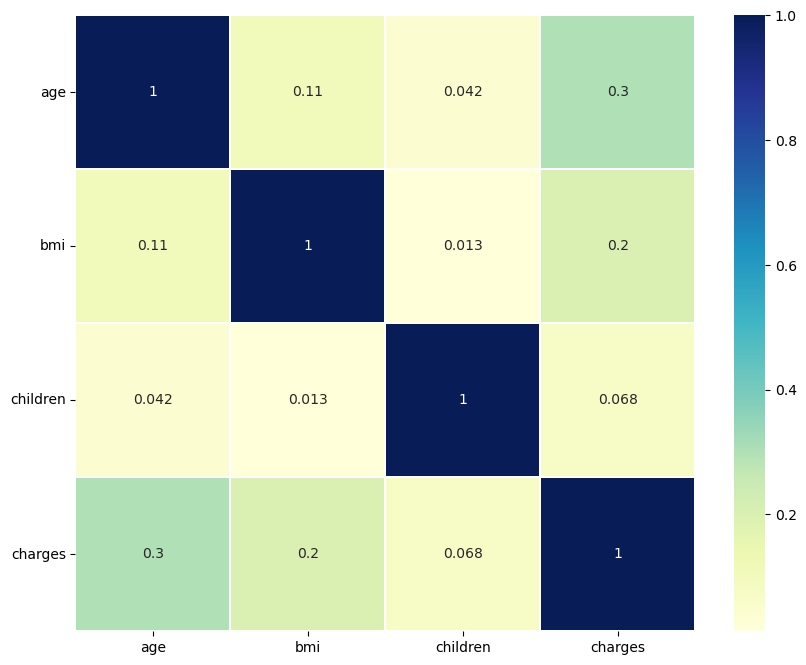

In [ ]:

print(f'I am graphing a correlation matrix to gain general understanding of all of my numeric variables. \nAll of the variables have a correlation in the positive direction.')

plt.figure(figsize=(10,8))
sns.heatmap(dfMain.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);


<seaborn.axisgrid.PairGrid>

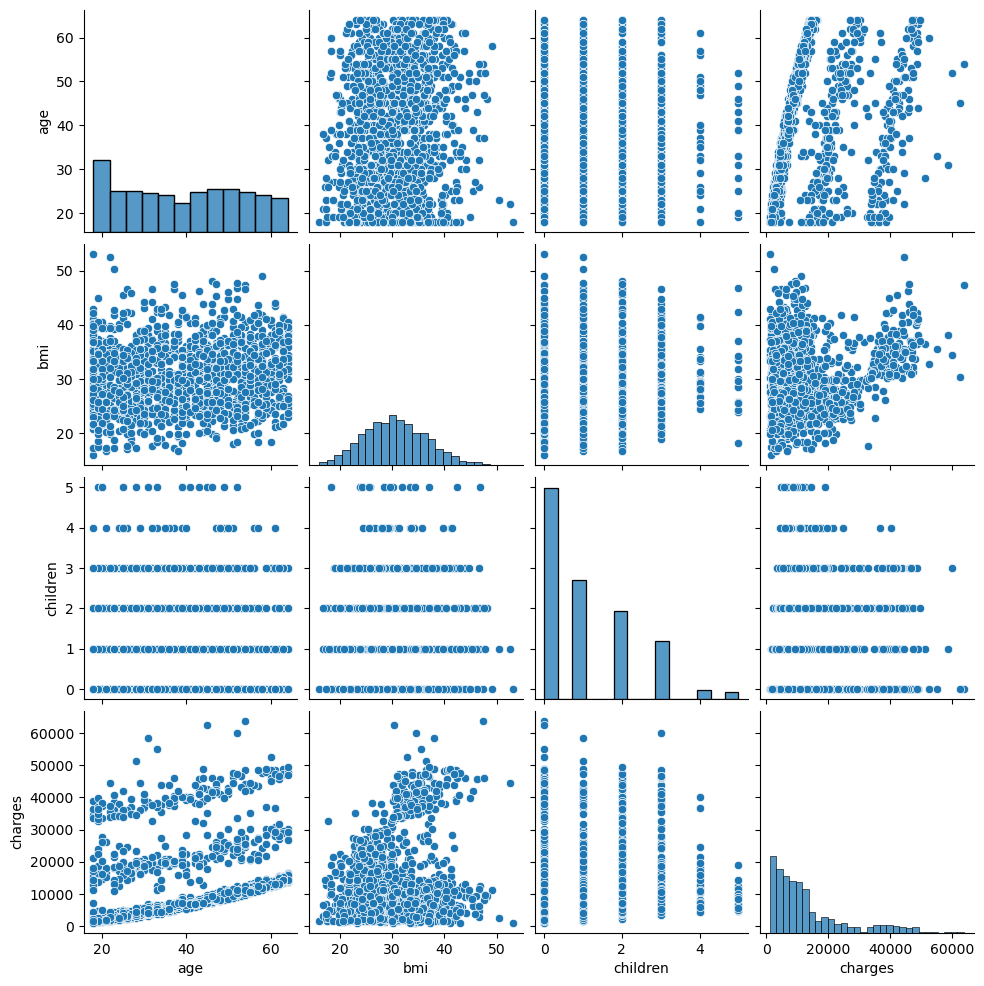

In [ ]:
# create a plot for every column in df
sns.pairplot(dfMain)

This is a positively skewed data. It shows that a larger number of people are charged on the lower end of the price range shown in our dataset


<AxesSubplot: ylabel='Frequency'>

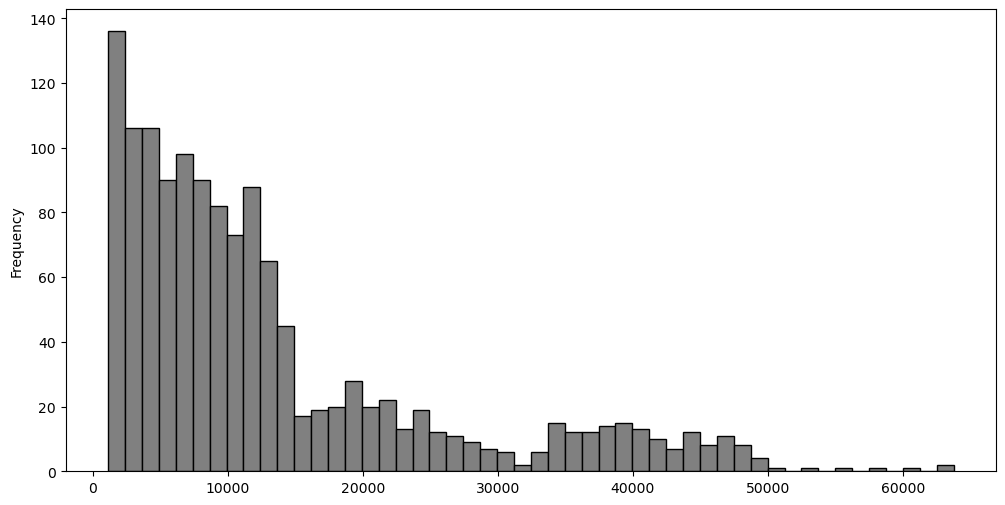

In [ ]:
print(f'This is a positively skewed data. It shows that a larger number of people are charged on the lower end of the price range shown in our dataset')
dfMain['charges'].plot(kind='hist', bins=50, figsize=(12,6), facecolor='grey',edgecolor='black')

# Task 2: Setting up an "Analysis Pipeline"

In [ ]:
# I am only interested in the variables 'smoker', 'age', and 'charges' so I will be removing the other columns. 

dfNew = dfMain.drop(columns=['sex', 'bmi', 'children', 'region'])
dfNew.rename(columns = {'age':'Age', 'smoker':'Smoker','charges':'Total Charges'}, inplace = True)
dfNew

,Age,Smoker,Total Charges
0,19,yes,16884.92400
1,18,no,1725.55230
2,28,no,4449.46200
3,33,no,21984.47061
4,32,no,3866.85520
...,...,...,...
1333,50,no,10600.54830
1334,18,no,2205.98080
1335,18,no,1629.83350
1336,21,no,2007.94500


In [ ]:
dfNew.info()

# This function shows that there is no null values in our dataset 
# The type of data for each variable is also stated below. 
#  - age and children are integers. 
#  - sex, smoker, and region are objects.
#  - bmi and charges are floating point numbers. 
# I will be changing 'children', 'sex', 'smoker', and 'region' variables to categories because they are categorical data. 
# 'age', 'bmi', and 'charges' are all numerical and continuous data, but I will keep age as an integer and the rest as floating point numbers. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1338 non-null   int64  
 1   Smoker         1338 non-null   object 
 2   Total Charges  1338 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 31.5+ KB


In [ ]:
# set categorical data

dfNew['Smoker'] = dfNew['Smoker'].astype('category')
dfNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            1338 non-null   int64   
 1   Smoker         1338 non-null   category
 2   Total Charges  1338 non-null   float64 
dtypes: category(1), float64(1), int64(1)
memory usage: 22.5 KB


In [ ]:
# generate preview of entries with null values

if dfNew.isnull().any(axis=None):
    print("\nPreview of data with null values:\nxxxxxxxxxxxxx")
    print(dfNew[dfNew.isnull().any(axis=1)])
    missingno.matrix(dfNew)
    plt.show()
else: 
    print("No null values in this dataset")
    
# There are no null values in this dataset

No null values in this dataset


In [ ]:
# generate count statistics of duplicate entries

if len(dfNew[dfNew.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(dfNew[dfNew.duplicated()]))
    print(dfNew[dfNew.duplicated(keep=False)].sort_values(by=list(dfNew.columns)))
else:
    print("No duplicated entries found")

# There is one set of duplicate entries in row 195 and row 581. 
#      age   sex    bmi children smoker     region    charges
# 195   19  male  30.59        0     no  northwest  1639.5631
# 581   19  male  30.59        0     no  northwest  1639.5631

No. of duplicated entries:  1
     Age Smoker  Total Charges
195   19     no      1639.5631
581   19     no      1639.5631


In [ ]:
dfMain.drop_duplicates(inplace=True)

if len(dfMain[dfMain.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(dfMain[dfMain.duplicated()]))
    print(dfMain[dfMain.duplicated(keep=False)].sort_values(by=list(dfMain.columns)))
else:
    print("No duplicated entries found")

# Now there are no more duplicate entries. 

No duplicated entries found


In [ ]:
# Next, I will round all of my float point values to 2 decimal places for simplicity. 

dfNew['Total Charges'] = dfNew['Total Charges'].round(decimals = 2)
dfNew.head()

,Age,Smoker,Total Charges
0,19,yes,16884.92
1,18,no,1725.55
2,28,no,4449.46
3,33,no,21984.47
4,32,no,3866.86


This is a boxplot for the total charges. As you can see, there are many outliers which can be removed.


<AxesSubplot: xlabel='Total Charges'>

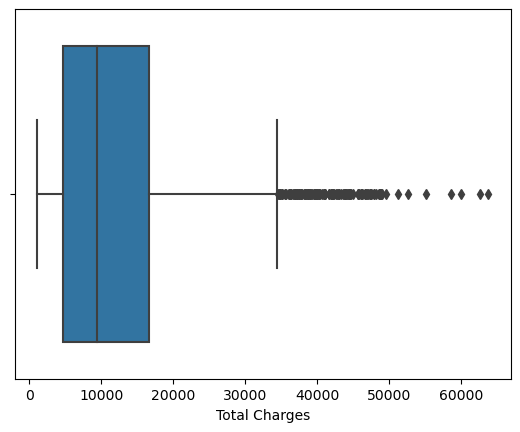

In [ ]:
print(f'This is a boxplot for the total charges. As you can see, there are many outliers which can be removed.')
sns.boxplot(x=dfNew['Total Charges'])

In [ ]:
for x in ['Total Charges']:
    q75,q25 = np.percentile(dfNew.loc[:,x],[75,25])
    iqr = q75-q25

    max = q75+(1.5*iqr)
    min = q25-(1.5*iqr)
 
    dfNew.loc[dfNew[x] < min,x] = np.nan
    dfNew.loc[dfNew[x] > max,x] = np.nan

# This code identified the outliers and converted them to null values

dfNew.isnull().sum()

# This code shows the amount of null values. 

Age                0
Smoker             0
Total Charges    139
dtype: int64

In [ ]:
dfNew = dfNew.dropna(axis = 0)

# This code drops the null values 

dfNew.isnull().sum()

Age              0
Smoker           0
Total Charges    0
dtype: int64

In [ ]:
dfNew.describe()

,Age,Total Charges
count,1199.000000,1199.000000
mean,38.989992,9927.753394
std,14.068040,7241.158279
min,18.000000,1121.870000
25%,26.000000,4408.695000
50%,39.000000,8410.050000
75%,51.000000,12953.595000
max,64.000000,34472.840000


# Task 3: Method Chaining and Writing Python Programs

In [ ]:
import project_functions3 as p3

In [ ]:
df = p3.load_and_process("../data/raw/raw_MC.csv")
display(df)

,Age,Smoker,Total Charges
0,19,yes,16884.92
1,18,no,1725.55
2,28,no,4449.46
3,33,no,21984.47
4,32,no,3866.86
...,...,...,...
1333,50,no,10600.55
1334,18,no,2205.98
1335,18,no,1629.83
1336,21,no,2007.94


In [ ]:
p3.removeOutliers(df)

Removed all outliers


C:\Users\oshog\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


(<AxesSubplot: title={'center': 'Medical Insurance Bills for Smokers and Non-Smokers'}, xlabel='Smoker', ylabel='Total Charges'>,
 <AxesSubplot: title={'center': 'Increasing Age and Medical Insurance Bills'}, xlabel='Age', ylabel='Total Charges'>)

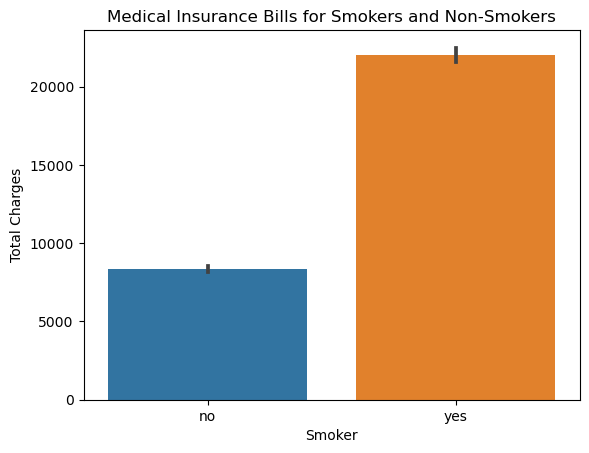

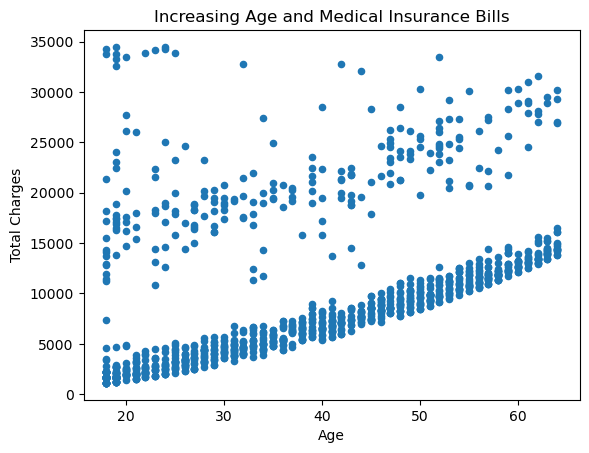

In [ ]:
p3.final_graphs(df)

# Task 4

#### Research Question 1: Is there a significant difference of medical costs billed between a smoker and a non-smoker?

H0:There is no significant difference of medical costs billed between a smoker and a non-smoker.

H1:There is a significant difference of medical costs billed between a smoker and a non-smoker.

Through the observations made in Plot 2, it can be seen that there is a noticeably higher amount of medical insurance charges associated with smokers compared to non-smokers. Because the error bars do not overlap, one can say that there is a significant difference for the total medical costs of an individual between a smoker and a non-smoker. To understand if the data is statistically significant, an independent samples t-test has to be done by studying the hypotheses stated above.  



#### Research Question 2: Is there a positive corrrelation between an individual's age and the medical costs billed by health insurance?

H0:There is no significant positive correlation between an individual's age and the medical costs billed by health insurance.

H1:There is a significant positive correlation between an individual's age and the medical costs billed by health insurance.

The scatterplot illustrate a positive linear correlation between an individual's age and the medical costs billed by health insurance. In other words, medical insurance costs are higher with increasing age. To find a effect size of this correlation, a Pearson's correlation test has to be done to study the hypotheses stated above. 



# Links to the Group Dashboard Presentation

[YouTube link](https://youtu.be/zzej29jvNDs)

[Google Drive link](https://drive.google.com/file/d/1BiRfXieeaTQXtO0DDJ7e73ZqwNhNDXa8/view?usp=share_link)
